In [115]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# YOU MAY NEED TO CHANGE THIS PATH....
folder_path = '/content/drive/MyDrive/real_data'
pixels_size = 28

# Define a transform to normalize the data
transform_training = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((pixels_size, pixels_size)),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.Grayscale(),
                                transforms.RandomRotation(45)
                                #transforms.RandomResizedCrop(28)
                                ])

transform_clean = transforms.Compose([transforms.ToTensor(),
                             transforms.Resize((pixels_size, pixels_size)),
                             transforms.Grayscale(),
                             transforms.Normalize((0.5,), (0.5,))
                             ])

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Download and load the training data
training_set_data = datasets.MNIST('./data',
                          download=True,
                          train=True,
                          transform=transform_training)

test_set_data = datasets.MNIST('./data',
                          download=True,
                          train=False,
                          transform=transform_clean)

real_data = datasets.ImageFolder(folder_path,
                                 transform=transform_clean)

loaded_training_data = torch.utils.data.DataLoader(training_set_data,
                                          batch_size=64,
                                          shuffle=True)

loaded_test_data = torch.utils.data.DataLoader(test_set_data,
                                          batch_size=64,
                                          shuffle=True)

loaded_real_data = torch.utils.data.DataLoader(real_data,
                                               batch_size=1050,
                                               shuffle=True)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

print("\n** how many elements **")
print(" Training_set_data: " + str(len(training_set_data)))
print("     Test_set_data: " +  str(len(test_set_data)))
print("     Real_set_data: " +  str(len(real_data)))
print("\n** Loaded after batch size **")
print(" Training data: " + str(len(loaded_training_data)))
print("     Test data: " +  str(len(loaded_test_data)))
print("     Real data: " +  str(len(loaded_real_data)))


** how many elements **
 Training_set_data: 60000
     Test_set_data: 10000
     Real_set_data: 1050

** Loaded after batch size **
 Training data: 938
     Test data: 157
     Real data: 1


# Funtion for single test

In [116]:
def test_model(loaded__data, iterations, user_text):

  graph_labels = ["0","1","2","3","4","5","6","7","8","9"]
  overall_iterations =  iterations
  losses_array = []
  how_many_correct = 0
  guess_sample_index = 0

  images, labels = next(iter(loaded__data))

  selected_image = images.view(images.shape[0], -1)
  print_out = images[0]
  true_label = labels[0]
  true_label_array = labels

  with torch.no_grad():
    logps_tensor = model(selected_image)

  ps_array = torch.exp(logps_tensor)


  # to get the percent of how many correct
  for index in range(overall_iterations):

    chosen_index = 0
    for ID_comapre in range(1 , 10):
      if ps_array[index][ID_comapre] > ps_array[index][chosen_index]:
        chosen_index = ID_comapre

    if str(chosen_index) == str(true_label_array[index].item()):
      how_many_correct += 1
    if index == 0:
      guess_sample_index = chosen_index

  percet = f"{how_many_correct/overall_iterations:.2%}"
  print("\n")
  print(user_text)
  print("How   many    Correct: "+ str(how_many_correct))
  print("Percentage    Correct: "+ str(percet) + '  <--')
  print("Guess   Sample Number: " + str(guess_sample_index) )
  print("Correct Sample Number: " + str(true_label.item()) + "\n")

  # Print out charts of one sample
  fig, (A1, A2) = plt.subplots(1, 2, figsize=(10, 4))
  probabilities = ps_array[0]
  A1.set_xlabel('Label: '+ str(true_label.item()))
  A1.imshow(print_out.permute(1,2,0), cmap='gray')
  A2.bar(graph_labels, probabilities)
  plt.tight_layout()
  plt.show()

# Traing the MINST data set 60000

Length of loaded_training_data:938
          Start . . . . . . . . . . END
Epoch 1-Training loss: 0.6159091800578368
          Start . . . . . . . . . . END
Epoch 2-Training loss: 0.4771659451602364
          Start . . . . . . . . . . END
Epoch 3-Training loss: 0.45032154237315347
          Start . . . . . . . . . . END
Epoch 4-Training loss: 0.42645058594246915
          Start . . . . . . . . . . END
Epoch 5-Training loss: 0.4139538610270664
          Start . . . . . . . . . . END
Epoch 6-Training loss: 0.4156138663972492





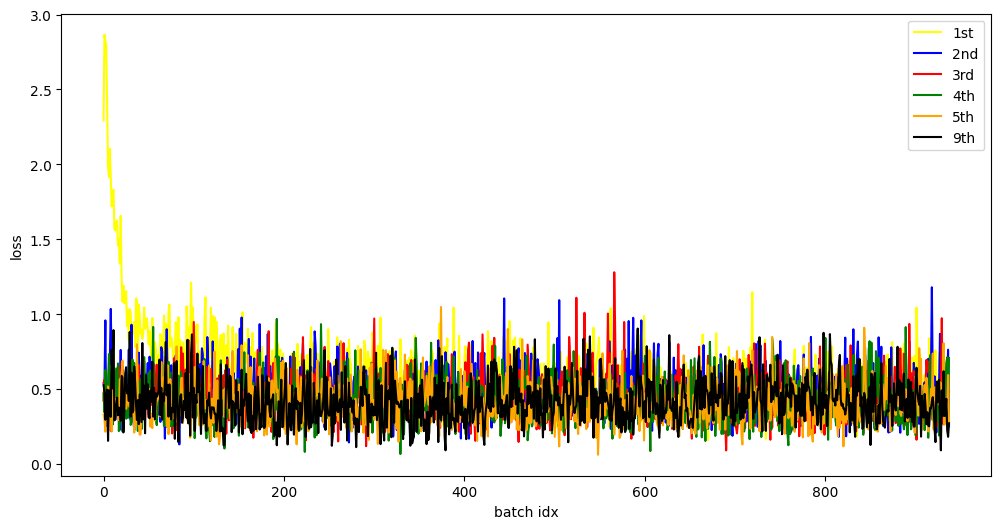

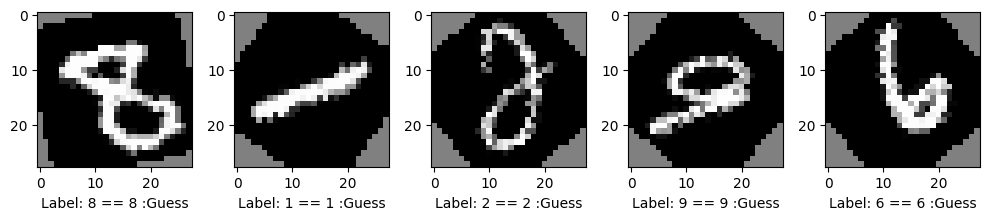

In [117]:
x = np.arange(len(loaded_training_data))
losses = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

print (f"Length of loaded_training_data:{len(loaded_training_data)}")

for epoch in range(6):
  total_loss = 0
  print("          Start", end=" ")
  for index, (tuple_images,tuple_label) in enumerate(loaded_training_data):

    # parse tuple data
    image = tuple_images
    label = tuple_label

    # manipulate data
    image = image.view(image.shape[0], -1)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # get data for graph
    total_loss += loss.item()
    if epoch < 20:
      losses[epoch].append(loss.item())
    probability_array = torch.exp(output)
    if index % 100 == 0:
      print(".", end=" ")

  print("END")
  print(f"Epoch {epoch+1}-Training loss: {total_loss/len(loaded_training_data)}")

print("\n\n")

plt.figure(figsize=[12, 6])
plt.plot(x, losses[0], color='yellow', label="1st")
plt.plot(x, losses[1], color='b', label="2nd")
plt.plot(x, losses[2], color='r', label="3rd")
plt.plot(x, losses[3], color='g', label="4th")
plt.plot(x, losses[4], color='orange', label="5th")
plt.plot(x, losses[5], color='black', label="9th")
plt.xlabel('batch idx')
plt.ylabel('loss')
plt.legend()
plt.show()

# find largest for each
NN_guess = []
for index in range(5):
  chosen_index = 0
  for ID_comapre in range(1 , 10):
    if probability_array[index][ID_comapre] > probability_array[index][chosen_index]:
      chosen_index = ID_comapre

  NN_guess.append(chosen_index)

print("\n\n")

# Print out charts of one sample
fig, (A1,A2,A3,A4,A5) = plt.subplots(1, 5, figsize=(10, 4))

A1.set_xlabel('Label: ' + str(tuple_label[0].item()) + ' == ' + str(NN_guess[0]) + ' :Guess' )
A1.imshow(tuple_images[0].permute(1,2,0), cmap='gray')

A2.set_xlabel('Label: ' + str(tuple_label[1].item())+ ' == ' + str(NN_guess[1]) + ' :Guess' )
A2.imshow(tuple_images[1].permute(1,2,0), cmap='gray')

A3.set_xlabel('Label: ' + str(tuple_label[2].item())+ ' == ' + str(NN_guess[2]) + ' :Guess' )
A3.imshow(tuple_images[2].permute(1,2,0), cmap='gray')

A4.set_xlabel('Label: ' + str(tuple_label[3].item())+ ' == ' + str(NN_guess[3]) + ' :Guess' )
A4.imshow(tuple_images[3].permute(1,2,0), cmap='gray')

A5.set_xlabel('Label: ' + str(tuple_label[4].item())+ ' == ' + str(NN_guess[4]) + ' :Guess' )
A5.imshow(tuple_images[4].permute(1,2,0), cmap='gray')

plt.tight_layout()
plt.show()


# Testing MINST results



 ** MINST testing Data ** 
How   many    Correct: 54
Percentage    Correct: 84.38%  <--
Guess   Sample Number: 3
Correct Sample Number: 1



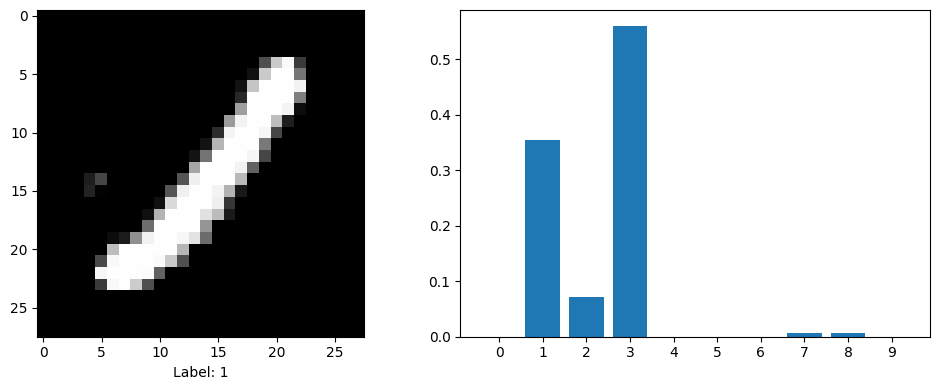

In [122]:
# to try out the model
test_model(loaded_test_data, 64, ' ** MINST testing Data ** ')

# Test All Class data



 ** Test Class Data ** 
How   many    Correct: 356
Percentage    Correct: 33.90%  <--
Guess   Sample Number: 2
Correct Sample Number: 2



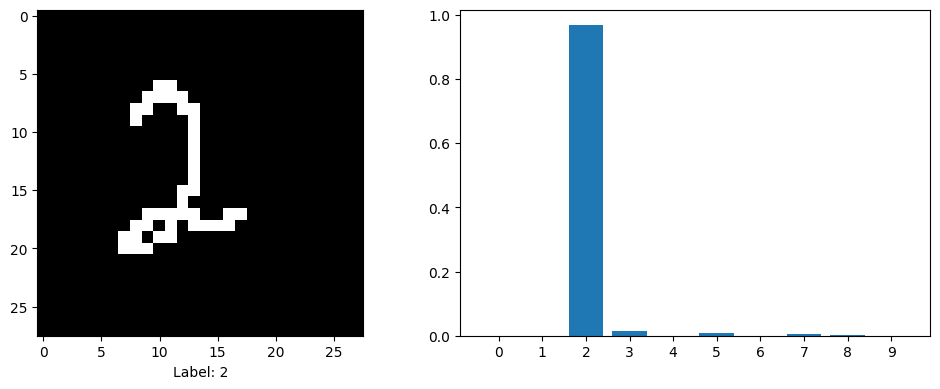

In [125]:
# Trying out the real data from the class
test_model(loaded_real_data, 1050, ' ** Test Class Data ** ')

# Train on the class data set

In [126]:
loaded_real_data = torch.utils.data.DataLoader(real_data,
                                               batch_size=64,
                                               shuffle=True)
# Train more -------------------------------------------------------
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(50):
  total_loss = 0
  for index, (tuple_images,tuple_label) in enumerate(loaded_real_data):

    # parse tuple data
    image = tuple_images
    label = tuple_label

    # manipulate data
    image = image.view(image.shape[0], -1)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # get data for graph
    total_loss += loss.item()

  print(f"Epoch {epoch+1}-Training loss: {total_loss}")

# Train more -------------------------------------------------------
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
  total_loss = 0
  for index, (tuple_images,tuple_label) in enumerate(loaded_real_data):

    # parse tuple data
    image = tuple_images
    label = tuple_label

    # manipulate data
    image = image.view(image.shape[0], -1)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # get data for graph
    total_loss += loss.item()

  print(f"Epoch {epoch+1}-Training loss: {total_loss}")


Epoch 1-Training loss: 43.386470675468445
Epoch 2-Training loss: 27.51707112789154
Epoch 3-Training loss: 23.977949500083923
Epoch 4-Training loss: 20.32348883152008
Epoch 5-Training loss: 19.444918632507324
Epoch 6-Training loss: 17.752376973628998
Epoch 7-Training loss: 16.14976578950882
Epoch 8-Training loss: 15.048679530620575
Epoch 9-Training loss: 14.854763448238373
Epoch 10-Training loss: 13.734135568141937
Epoch 11-Training loss: 13.159257292747498
Epoch 12-Training loss: 12.004944324493408
Epoch 13-Training loss: 11.142037153244019
Epoch 14-Training loss: 11.23616173863411
Epoch 15-Training loss: 9.18789592385292
Epoch 16-Training loss: 8.63062235713005
Epoch 17-Training loss: 8.079806879162788
Epoch 18-Training loss: 7.525389075279236
Epoch 19-Training loss: 7.832208186388016
Epoch 20-Training loss: 7.908633798360825
Epoch 21-Training loss: 8.5539271235466
Epoch 22-Training loss: 7.475577265024185
Epoch 23-Training loss: 7.403716802597046
Epoch 24-Training loss: 7.77548114955

# New results



 ** Test Class Data ** 
How   many    Correct: 1003
Percentage    Correct: 95.52%  <--
Guess   Sample Number: 9
Correct Sample Number: 9



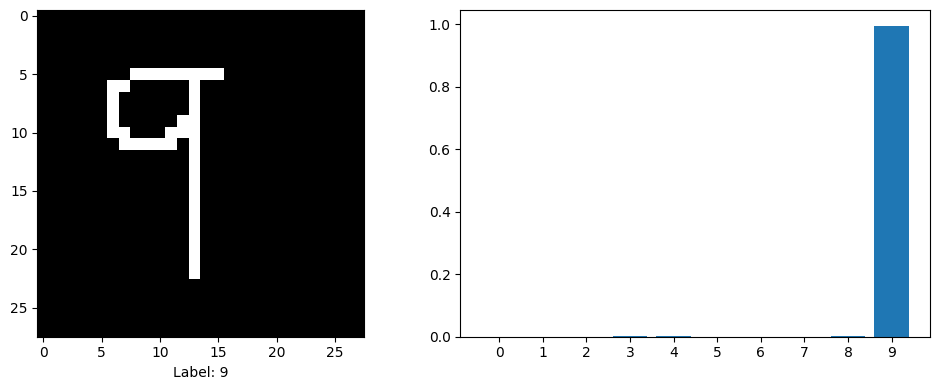

In [128]:
# change back to the full data set
loaded_real_data = torch.utils.data.DataLoader(real_data,
                                               batch_size=1050,
                                               shuffle=True)

test_model(loaded_real_data, 1050, ' ** Test Class Data ** ')



 ** MINST testing Data ** 
How   many    Correct: 46
Percentage    Correct: 71.88%  <--
Guess   Sample Number: 1
Correct Sample Number: 1



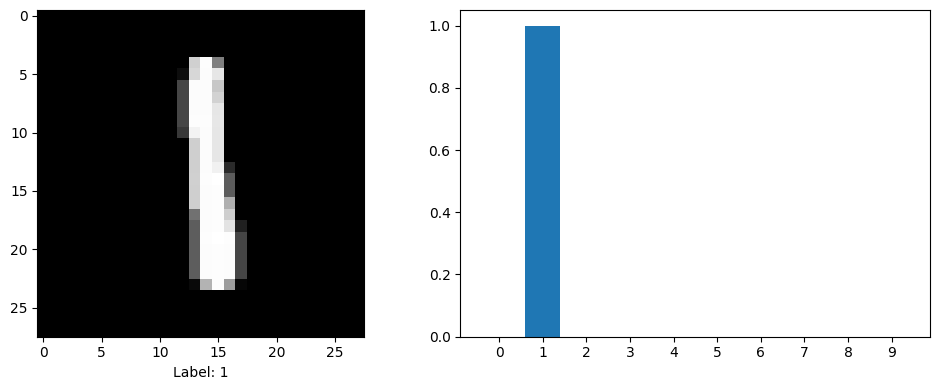

In [133]:
# to try out the model
test_model(loaded_test_data, 64, ' ** MINST testing Data ** ')